In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [321]:
for i in range(data.shape[0]):
    if data.loc[i, 'price_change'] == -1:
        data.loc[i, 'price_change'] = 0

In [322]:
# data_btc = pd.read_csv('../datasets/Bitcoin Historical Data(2010-2022).csv')
# data_btc.rename(columns=str.lower, inplace=True)

# from datetime import datetime
# from statistics import mean

# data_btc.date = [datetime.strptime(d, '%Y-%m-%d') for d in data_btc.date]
# data_btc = data_btc.sort_values(by='date')
# data_btc = data_btc.reset_index(drop=True)

# from datetime import timedelta

# data_btc = data_btc[data_btc.date >= datetime.strptime('2019-05-10', '%Y-%m-%d')]
# data_btc = data_btc[data_btc.date <= datetime.strptime('2019-11-23', '%Y-%m-%d')]
# data_btc.reset_index(drop=True, inplace=True)

# # data_btc['sentiments'] = [(d[1:1396]) for d in data.itertuples()]
# # data_btc['mean_sentiment'] = [round(mean(d[1:1396]), 4) for d in data.itertuples()]

# neg_tweets = []
# neu_tweets = []
# pos_tweets = []

# for d in data.itertuples():
#     neg = 0
#     neu = 0
#     pos = 0

#     for a in d[1:1396]:
#         if a < -0.05:
#             neg += 1
#         elif a > 0.05:
#             pos += 1
#         else:
#             neu += 1

#     neg_tweets.append(neg)
#     neu_tweets.append(neu)
#     pos_tweets.append(pos)

# data_btc['neg_tweets'] = neg_tweets
# data_btc['neu_tweets'] = neu_tweets
# data_btc['pos_tweets'] = pos_tweets
# data_btc['price_change'] = data.price_change
# data_btc.drop(columns=['open', 'close', 'date'], inplace=True)
# data = data_btc
# data

In [323]:
target = 'price_change'

train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index).sample(frac=1.0, random_state=1)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [324]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [325]:
import tensorflow as tf

modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.LSTM(40, input_shape=(1395, 1)))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Dense(40))
modelo.add(tf.keras.layers.Dense(2))

modelo.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 40)                6720      
                                                                 
 batch_normalization_26 (Bat  (None, 40)               160       
 chNormalization)                                                
                                                                 
 dense_54 (Dense)            (None, 40)                1640      
                                                                 
 dense_55 (Dense)            (None, 2)                 82        
                                                                 
Total params: 8,602
Trainable params: 8,522
Non-trainable params: 80
_________________________________________________________________


In [326]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='mean_squared_error',
               metrics=['accuracy'])

In [327]:
epoch = 500
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       shuffle=True,
                       epochs=epoch)

Epoch 1/500
5/5 [==============================] - 3s 384ms/step - loss: 0.6068 - accuracy: 0.5127 - val_loss: 0.3830 - val_accuracy: 0.4500
Epoch 2/500
5/5 [==============================] - 1s 291ms/step - loss: 0.4720 - accuracy: 0.4494 - val_loss: 0.3457 - val_accuracy: 0.5250
Epoch 3/500
5/5 [==============================] - 1s 294ms/step - loss: 0.4107 - accuracy: 0.4873 - val_loss: 0.3133 - val_accuracy: 0.6000
Epoch 4/500
5/5 [==============================] - 1s 288ms/step - loss: 0.3754 - accuracy: 0.5000 - val_loss: 0.2890 - val_accuracy: 0.5750
Epoch 5/500
5/5 [==============================] - 1s 294ms/step - loss: 0.3279 - accuracy: 0.5506 - val_loss: 0.2702 - val_accuracy: 0.5750
Epoch 6/500
5/5 [==============================] - 1s 294ms/step - loss: 0.3006 - accuracy: 0.4937 - val_loss: 0.2559 - val_accuracy: 0.5750
Epoch 7/500
5/5 [==============================] - 1s 278ms/step - loss: 0.2792 - accuracy: 0.4810 - val_loss: 0.2479 - val_accuracy: 0.5750
Epoch 8/500
5

In [ ]:
from statistics import mean

print(f"Accuracy training: {mean(historial.history['accuracy'])}")
print(f"Accuracy validation: {mean(historial.history['val_accuracy'])}")

Accuracy training: 0.5263924033045769
Accuracy validation: 0.5628000003099441


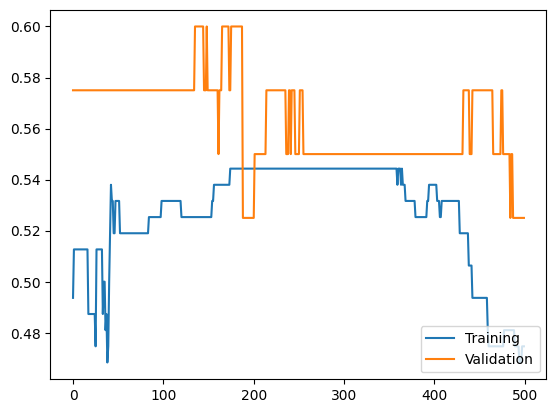

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

plt.plot(range(epoch), acc, label='Training')
plt.plot(range(epoch), val_acc, label='Validation')
plt.legend(loc='lower right')

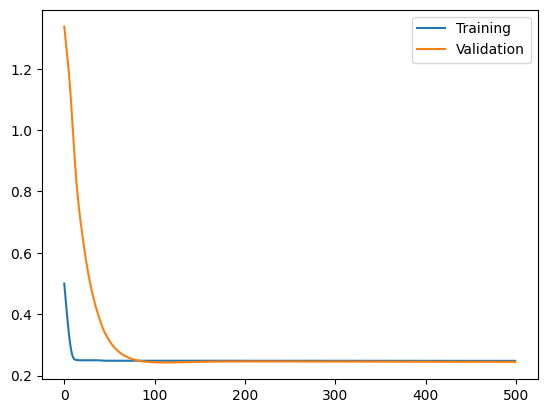

In [ ]:
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(epoch), loss, label='Training')
plt.plot(range(epoch), val_loss, label='Validation')
plt.legend(loc='upper right')

2/2 [==============================] - 0s 2ms/step


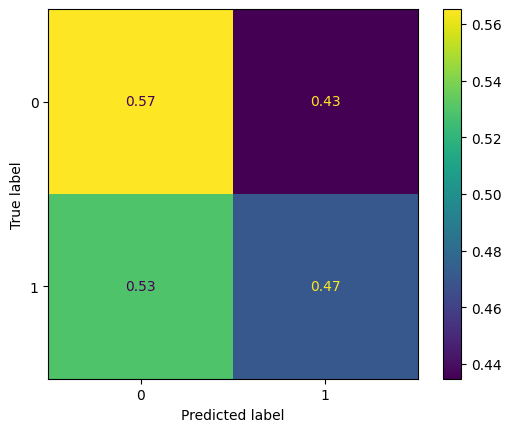

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(x_test)
cf = confusion_matrix(y_test, list(map(np.argmax, y_pred)), normalize='true')
ConfusionMatrixDisplay(cf).plot()